In [1]:
#importing the essential libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime, timedelta

In [18]:
data=pd.read_csv('Bitcoin_Data_2018_to_2022.csv')


In [19]:
df=pd.DataFrame(data)
df.columns = ["Date","Open", "Close", "High", "Low", "Volume"]

In [20]:
df.set_index('Date')

,Open,Close,High,Low,Volume
Date,,,,,
2018-01-07,18343.662493,17039.873914,18343.662493,14093.606831,16385.178543
2018-01-08,17039.873914,15900.365022,18343.662493,15321.932852,16643.286856
2018-01-09,15900.365022,15604.723408,18343.662493,15583.885538,16683.685507
2018-01-10,15604.723408,15509.270127,18343.662493,15509.270127,16673.026163
2018-01-11,15509.270127,14050.569606,18343.662493,14050.569606,16397.912507
...,...,...,...,...,...
2022-01-27,36988.928511,36870.440167,40707.682414,35180.435463,37048.100418
2022-01-28,36870.440167,37276.839558,37276.839558,35180.435463,36557.980010
2022-01-29,37276.839558,37852.579028,37852.579028,35180.435463,36749.948473


In [21]:

import tensorflow.python.tools

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout

layer_builder = Sequential()

df['3MA'] = df['Close'].shift(1).rolling(window = 3).mean()

df['10MA'] = df['Close'].shift(1).rolling(window = 10).mean()

df['15MA'] = df['Close'].shift(1).rolling(window = 15).mean()

df['Price_Rise'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
# df=df.dropna()


In [22]:
df=df.dropna()
df

,Date,Open,Close,High,Low,Volume,3MA,10MA,15MA,Price_Rise
15,2018-01-22,11703.504863,10991.595013,13260.271187,10991.595013,11774.653108,12240.748461,13027.217295,13891.798335,0
16,2018-01-23,10991.595013,10894.000905,13260.271187,10894.000905,11656.094163,11985.123688,12650.447333,13488.579741,1
17,2018-01-24,10894.000905,11277.115970,13260.271187,10894.000905,11636.340323,11196.366927,12220.515934,13154.822134,0
18,2018-01-25,11277.115970,11225.254457,13260.271187,10894.000905,11587.173104,11054.237296,11900.568634,12866.314971,0
19,2018-01-26,11225.254457,11044.907237,13260.271187,10894.000905,11485.235662,11132.123778,11581.894309,12580.713927,1
...,...,...,...,...,...,...,...,...,...,...
1481,2022-01-27,36988.928511,36870.440167,40707.682414,35180.435463,37048.100418,36689.781698,39202.940624,40516.293959,1
1482,2022-01-28,36870.440167,37276.839558,37276.839558,35180.435463,36557.980010,36877.791940,38578.005427,40122.509235,1
1483,2022-01-29,37276.839558,37852.579028,37852.579028,35180.435463,36749.948473,37045.402745,38075.855271,39675.506717,1
1484,2022-01-30,37852.579028,38232.178732,38232.178732,36306.409440,37185.911797,37333.286251,37621.567294,39358.451318,0


In [23]:
X = df.iloc[:, 5:-1]

Y = df.iloc[:, -1]

split_data = int(len(df)*0.7)

X_train, X_test, Y_train, Y_test = X.iloc[:split_data, :], X.iloc[split_data:, :], Y.iloc[:split_data], Y.iloc[split_data:]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [24]:

# First input layer

layer_builder.add(Dense(units = 128, kernel_initializer = 'uniform',

activation = 'relu', input_dim = X.shape[1]))

# Second input layer

layer_builder.add(Dense(units = 128, kernel_initializer = 'uniform'

, activation = 'relu'))

# Output layer

layer_builder.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))



In [25]:

# Compile the layers

layer_builder.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])


layer_builder.fit(X_train, Y_train, batch_size = 5, epochs = 100)

Y_pred = layer_builder.predict(X_test)

Y_pred = (Y_pred > 0.5)

#Store predictions back into dataframe

df['Y_Pred'] = np.NaN

df.iloc[(-len(Y_pred)):,-1:] = Y_pred.flatten()

#Fit ANN to training set

layer_builder.fit(X_train, Y_train, batch_size = 5, epochs = 100)

Y_pred = layer_builder.predict(X_test)

Y_pred = (Y_pred > 0.5)

#Store predictions back into dataframe

df['Y_Pred'] = np.NaN

df.iloc[(-len(Y_pred)):,-1:] = Y_pred.flatten()

Epoch 1/100
206/206 [==============================] - 1s 2ms/step - loss: 0.2495 - accuracy: 0.5112
Epoch 2/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.5287
Epoch 3/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2492 - accuracy: 0.5287
Epoch 4/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.5287
Epoch 5/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.5287
Epoch 6/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.5287
Epoch 7/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.5287
Epoch 8/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.5287
Epoch 9/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.5287
Epoch 10/100
206/206 [==============================] - 0s 2ms/step - loss: 0.2489 - accura

In [27]:
df.columns

Index(['Date', 'Open', 'Close', 'High', 'Low', 'Volume', '3MA', '10MA', '15MA',
       'Price_Rise', 'Y_Pred'],
      dtype='object')

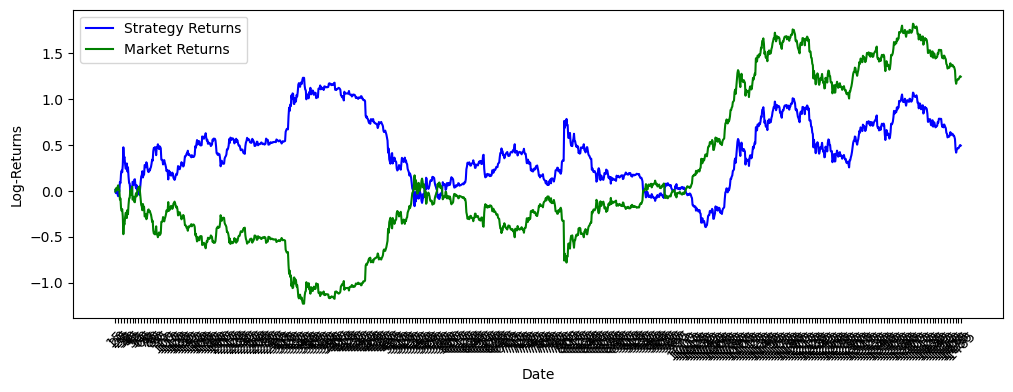

In [28]:
# Strategy Returns
df['Returns'] = 0
# Get the log returns
df['Returns'] = np.log(df['Close']/df['Close'].shift(1))

# Shift so that the returns are in line with the day they were achieved

df['Returns'] = df['Returns'].shift(-1)

df['Strategy Returns'] = 0

df['Strategy Returns'] = np.where(df['Y_Pred'] == True, df['Returns'], - df['Returns'])

df['Cumulative Market Returns'] = np.cumsum(df['Returns'])

df['Cumulative Strategy Returns'] = np.cumsum(df['Strategy Returns'])

# Visualize Returns

plt.figure(figsize=(12,4))

plt.plot(df['Cumulative Strategy Returns'], color = 'Blue', label = 'Strategy Returns')

plt.plot(df['Cumulative Market Returns'], color = 'Green', label = 'Market Returns')

plt.xlabel('Date')

plt.xticks(df.index[::5], rotation = 45)

plt.ylabel('Log-Returns')

plt.legend()

plt.show()

####################################



Sharpe Ratio: 0.1356496386621364


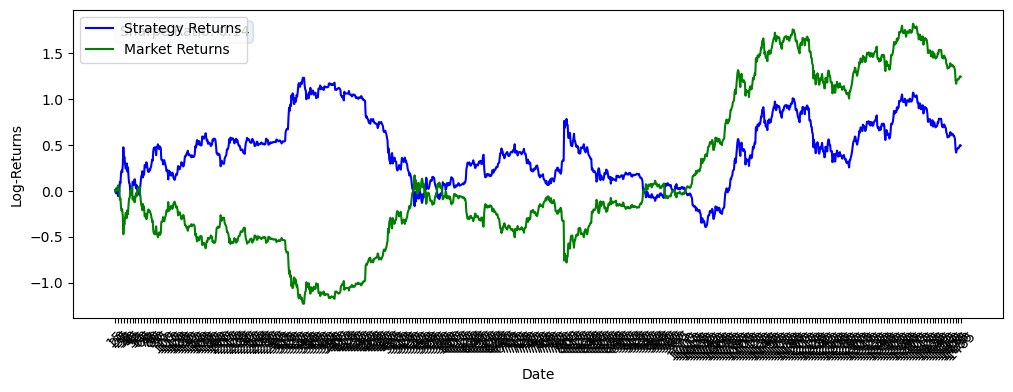

In [29]:

daily_returns = df['Strategy Returns'].dropna()
sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)  # Assuming 252 trading days in a year

print("Sharpe Ratio:", sharpe_ratio)

# Visualize Returns and Sharpe Ratio
plt.figure(figsize=(12, 4))
plt.plot(df['Cumulative Strategy Returns'], color='Blue', label='Strategy Returns')
plt.plot(df['Cumulative Market Returns'], color='Green', label='Market Returns')
plt.xlabel('Date')
plt.xticks(df.index[::5], rotation=45)
plt.ylabel('Log-Returns')
plt.legend()

# Display Sharpe Ratio on the plot
plt.annotate(f'Sharpe Ratio: {sharpe_ratio:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, ha='left', va='top', bbox=dict(boxstyle='round', alpha=0.1))

plt.show()